In [ ]:
pip install tensorflow numpy matplotlib

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models,datasets


In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train=X_train/255
X_test=X_test/255


In [ ]:
X_train=X_train.reshape(-1,28*28)
X_test=X_test.reshape(-1,28*28)

In [ ]:
def create_model():
    model=models.Sequential([
        layers.Input(shape=(28*28,)),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation="softmax")
])
    return model

In [ ]:
learning_rate = [0.01,0.001,0.0001]
histories = {}

In [ ]:
for lr in learning_rate:
    model=create_model()
    optimizer=keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
    history=model.fit(X_train,y_train,epochs=10,batch_size=64,validation_data=(X_test,y_test))
    histories[lr]=history.history

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8836 - loss: 0.3718 - val_accuracy: 0.9507 - val_loss: 0.1636
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9594 - loss: 0.1401 - val_accuracy: 0.9533 - val_loss: 0.1680
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9646 - loss: 0.1198 - val_accuracy: 0.9614 - val_loss: 0.1421
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9699 - loss: 0.1063 - val_accuracy: 0.9632 - val_loss: 0.1481
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9747 - loss: 0.0908 - val_accuracy: 0.9632 - val_loss: 0.1401
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9734 - loss: 0.0946 - val_accuracy: 0.9657 - val_loss: 0.1383
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9764 - loss: 0.0893 - val_accuracy: 0.9638 - val_loss: 0.1589
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9771 - loss: 0.0817 - val_accuracy: 0.

<ipython-input-35-88d3ed1b15a2>:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(histories[lr]['accuracy'], label=("Train Accuracy" ,lr))


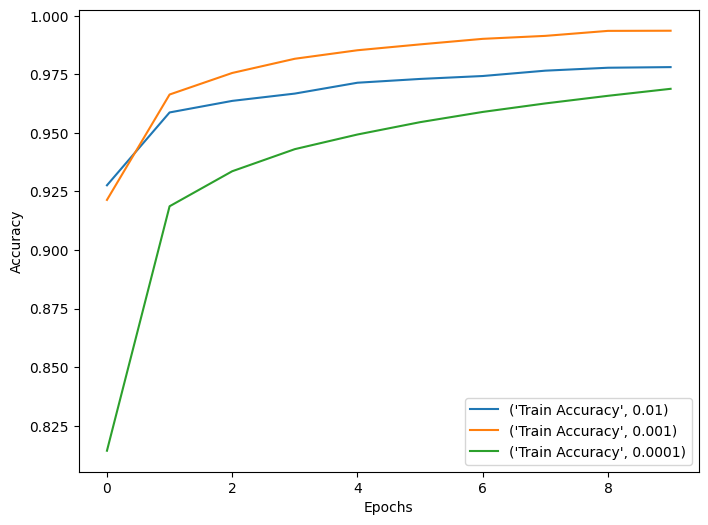

In [ ]:
plt.figure(figsize=(8,6))

for lr in learning_rate:
    plt.plot(histories[lr]['accuracy'], label=("Train Accuracy" ,lr))

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()